In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [754]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit, RepeatedStratifiedKFold, cross_validate, TunedThresholdClassifierCV, FixedThresholdClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, precision_recall_curve

from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn
sklearn.__version__

'1.5.1'

### Область работы 2 (поиск  модели .... )

In [665]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [666]:
df_test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
df.tail(3)
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB
None


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1294.000000       1294.000000  1295.000000     1295.000000   
mean        8.438872          0.500920     0.298880        2.573398   
std         1.818823          0.182181     0.200443        1.366700   
min         4.700000          0.120000     0.000000        0.900000   
25%         7.200000          0.360000     0.120000        1.900000   
50%         8.100000          0.480000     0.310000        2.200000   
75%         9.400000          0.620000     0.455000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1295.000000          1295.000000           1295.000000  1295.000000   
mean      0.085467            15.362934             44.651351     0.996576   
std       0.045056            10.487662             35.420622     0.001968   
min       0.012000             1.000000              7.000000     0.990070   
25%       0.068000             7.000000             20.000000     0.995315   
50%       0.078000            13.000000             34.000000     0.996600   
75%       0.090000            21.000000             57.000000     0.997765   
max       0.611000            72.000000            289.000000     1.003200   

                pH    sulphates      alcohol      quality  
count  1294.000000  1293.000000  1295.000000  1295.000000  
mean      3.303648     0.678415    10.676100     5.937452  
std       0.157238     0.169927     1.174136     0.955717  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.200000     0.570000     9.600000     5.000000  
50%       3.300000     0.640000    10.500000     6.000000  
75%       3.390000     0.760000    11.500000     7.000000  
max       4.010000     2.000000    14.900000     8.000000

In [667]:
mask = df.notna().all(axis=1) # предоставить маску вместе с y-предиктом
df = df[mask]
df_test_clean = df_test[mask]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1291 non-null   float64
 1   volatile acidity      1291 non-null   float64
 2   citric acid           1291 non-null   float64
 3   residual sugar        1291 non-null   float64
 4   chlorides             1291 non-null   float64
 5   free sulfur dioxide   1291 non-null   float64
 6   total sulfur dioxide  1291 non-null   float64
 7   density               1291 non-null   float64
 8   pH                    1291 non-null   float64
 9   sulphates             1291 non-null   float64
 10  alcohol               1291 non-null   float64
 11  quality               1291 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 131.1 KB


C:\Users\gravi\AppData\Local\Temp\ipykernel_14176\1778178406.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_clean = df_test[mask]


### предполагаемая свинья, почти четверть изначального датасета составляли дупликаты, режем свинью

In [668]:
df = df.drop_duplicates() 
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               5.0              0.74         0.00            1.20      0.041   
1              11.0              0.26         0.68            2.55      0.085   
2               7.3              0.38         0.21            2.00      0.080   
3               8.9              0.28         0.45            1.70      0.067   
4               9.2              0.41         0.50            2.50      0.055   
...             ...               ...          ...             ...        ...   
1285            6.8              0.81         0.05            2.00      0.070   
1286            5.9              0.46         0.00            1.90      0.077   
1288           10.7              0.67         0.22            2.70      0.107   
1289           13.5              0.53         0.79            4.80      0.120   
1293            7.5              0.52         0.40            2.20      0.060   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    16.0                  46.0  0.99258  4.01       0.59   
1                    10.0                  25.0  0.99700  3.18       0.61   
2                     7.0                  35.0  0.99610  3.33       0.47   
3                     7.0                  12.0  0.99354  3.25       0.55   
4                    12.0                  25.0  0.99520  3.34       0.79   
...                   ...                   ...      ...   ...        ...   
1285                  6.0                  14.0  0.99562  3.51       0.66   
1286                 25.0                  44.0  0.99385  3.50       0.53   
1288                 17.0                  34.0  1.00040  3.28       0.98   
1289                 23.0                  77.0  1.00180  3.18       0.77   
1293                 12.0                  20.0  0.99474  3.26       0.64   

      alcohol  quality  
0        12.5        6  
1        11.8        5  
2         9.5        5  
3        12.3        7  
4        13.3        7  
...       ...      ...  
1285     10.8        6  
1286     11.2        5  
1288      9.9        6  
1289     13.0        5  
1293     11.8        6  

[1015 rows x 12 columns]

In [669]:
pd.plotting.radviz(df, 'quality')

<Axes: >

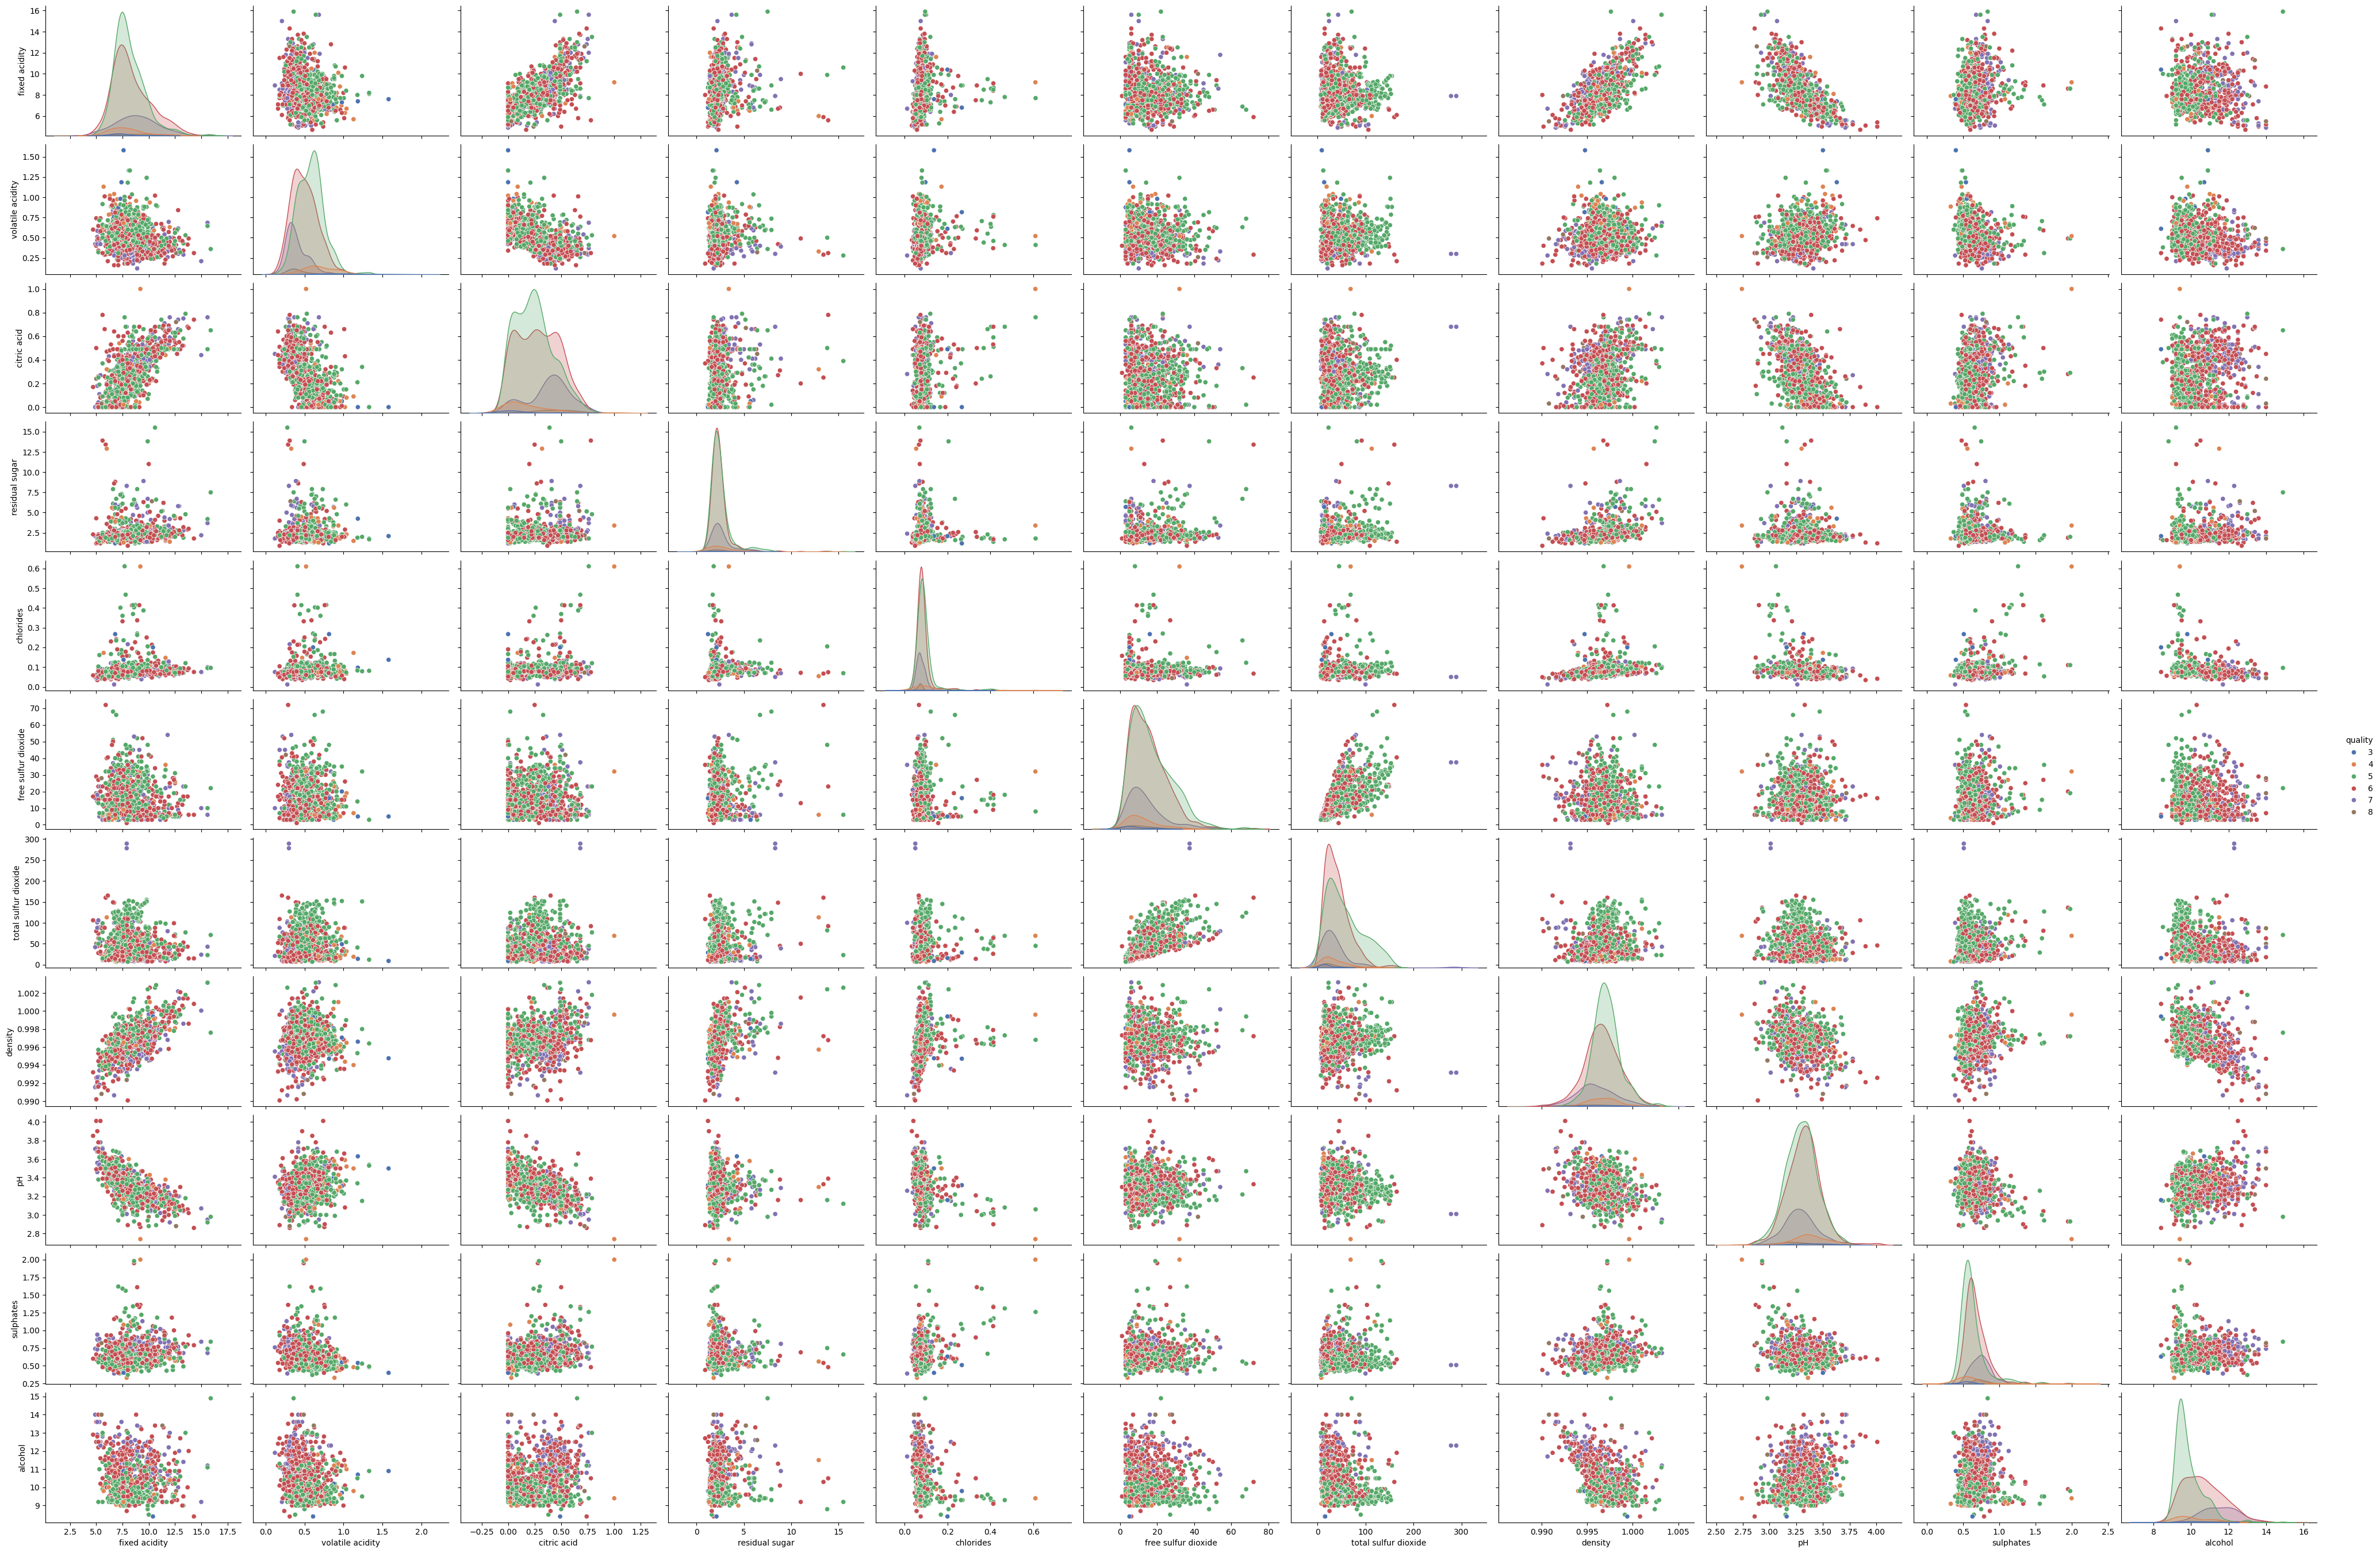

In [670]:
sns.pairplot(df, hue='quality', palette="deep", aspect=1.5);  

In [671]:
df["quality"] = np.where(df["quality"] >= 7, 1, 0) # сводим задачу к бинарной классификации
df.quality.value_counts()

quality
0    877
1    138
Name: count, dtype: int64

<Axes: >

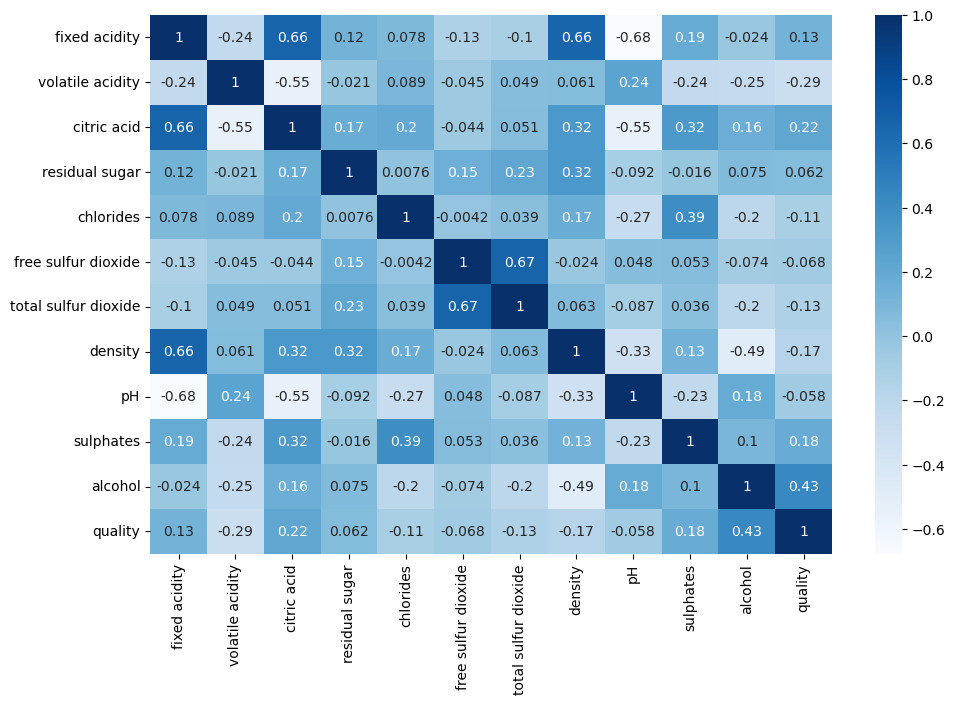

In [672]:
corr = df.corr()
plt.figure(figsize=(11,7))
sns.heatmap(corr, cmap="Blues", annot=True) # есть столбцы(fixed acidity, citric acid, density) с корреляцией > 0.5

<Axes: >

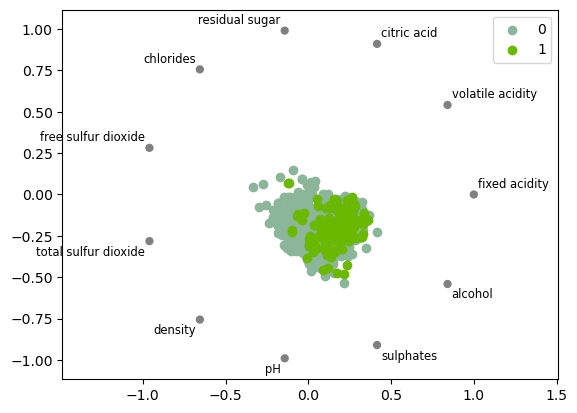

In [673]:
#видим, что хорошее вино будет довольно сложно отделить от плохого
pd.plotting.radviz(df, 'quality')

In [674]:
y=df['quality']
X=df.drop(['quality'], axis=1)
y.value_counts()

quality
0    877
1    138
Name: count, dtype: int64

In [676]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size=0.6, stratify = y)

In [677]:
### KNN
cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)

pipe = Pipeline([('preprocessing', MinMaxScaler()),
                 ('classifier', KNeighborsClassifier())])

n_neighbors=np.arange(15, 100, 5)
p=[5, 6, 7, 8, 10, 12]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()],
     'classifier': [KNeighborsClassifier(n_jobs=-1)],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring = 'precision')
grid.fit(X_train,y_train)

D:\trash2\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier(n_jobs=-1)],
                          'classifier__n_neighbors': array([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]),
                          'classifier__p': [5, 6, 7, 8, 10, 12],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]}],
             return_train_score=True, scoring='precision')

In [678]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

166  \
mean_fit_time                                                           0.025057   
std_fit_time                                                             0.01131   
mean_score_time                                                         0.107639   
std_score_time                                                          0.033836   
param_classifier                                 KNeighborsClassifier(n_jobs=-1)   
param_classifier__n_neighbors                                                 35   
param_classifier__p                                                            8   
param_classifier__weights                                               distance   
param_preprocessing                                             StandardScaler()   
params                         {'classifier': KNeighborsClassifier(n_jobs=-1)...   
split0_test_score                                                            1.0   
split1_test_score                                                            1.0   
split2_test_score                                                            1.0   
split3_test_score                                                           0.75   
split4_test_score                                                            1.0   
mean_test_score                                                             0.95   
std_test_score                                                               0.1   
rank_test_score                                                                1   
split0_train_score                                                           1.0   
split1_train_score                                                           1.0   
split2_train_score                                                           1.0   
split3_train_score                                                           1.0   
split4_train_score                                                           1.0   
mean_train_score                                                             1.0   
std_train_score                                                              0.0   

                                                                             142  \
mean_fit_time                                                           0.032748   
std_fit_time                                                            0.025509   
mean_score_time                                                         0.103234   
std_score_time                                                           0.01614   
param_classifier                                 KNeighborsClassifier(n_jobs=-1)   
param_classifier__n_neighbors                                                 30   
param_classifier__p                                                           12   
param_classifier__weights                                               distance   
param_preprocessing                                             StandardScaler()   
params                         {'classifier': KNeighborsClassifier(n_jobs=-1)...   
split0_test_score                                                            0.8   
split1_test_score                                                            0.6   
split2_test_score                                                            1.0   
split3_test_score                                                       0.666667   
split4_test_score                                                            1.0   
mean_test_score                                                         0.813333   
std_test_score                                                          0.165462   
rank_test_score                                                                2   
split0_train_score                                                           1.0   
split1_train_score                                                           1.0   
split2_train_score                                                           1.0   
split3_train_score                          

In [679]:
grid.best_params_ 

{'classifier': KNeighborsClassifier(n_jobs=-1),
 'classifier__n_neighbors': 35,
 'classifier__p': 8,
 'classifier__weights': 'distance',
 'preprocessing': StandardScaler()}

In [680]:
model = Pipeline([('preprocessing', StandardScaler()),
                 ('classifier', KNeighborsClassifier(n_neighbors=35, p=10, weights='distance'))])
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
model.score(X_test, y_test)

1.0


0.8819672131147541

In [681]:
y_pred_2 = model.predict(X_test)
matrix_2=confusion_matrix(y_test,y_pred_2)
matrix_2

array([[261,   3],
       [ 33,   8]], dtype=int64)

In [682]:
# в качестве основной метрики берём precision, лучше всего подходит к условию задания, в т.ч с учётом 
# жирного намёка в README
precision_score(y_test,y_pred_2) 

0.7272727272727273

позиция порога 0.5 -  7
в позиции 4 для ROC
fpr:     0.004  tpr:        0.171  thresholds:,0.522
recall:  0.171  precision:, 0.875  thresholds:,0.522


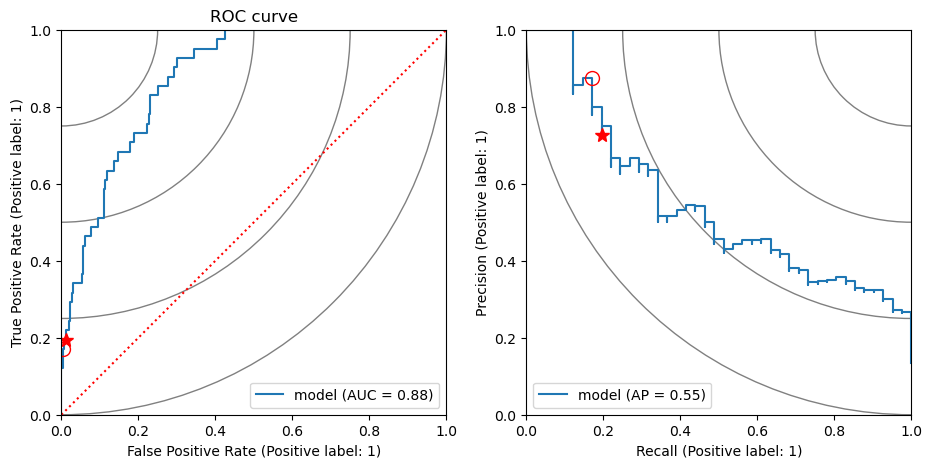

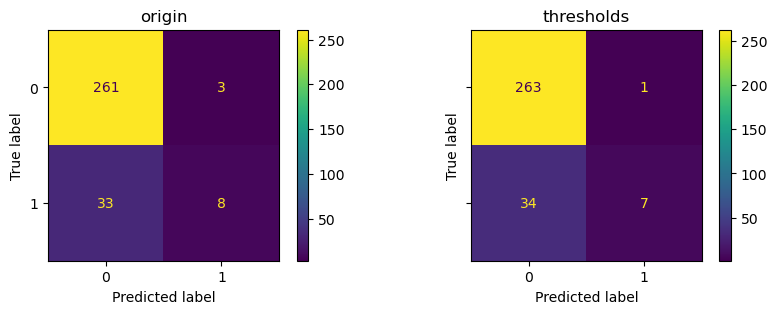

origin 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 
 
 0 
 0.887755 
 0.988636 
 0.935484 
 264.000000 
 
 
 1 
 0.727273 
 0.195122 
 0.307692 
 41.000000 
 
 
 accuracy 
 0.881967 
 0.881967 
 0.881967 
 0.881967 
 
 
 macro avg 
 0.807514 
 0.591879 
 0.621588 
 305.000000 
 
 
 weighted avg 
 0.866182 
 0.881967 
 0.851092 
 305.000000 
 
 
 

 
 thresholds 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 
 
 0 
 0.885522 
 0.996212 
 0.937611 
 264.000000 
 
 
 1 
 0.875000 
 0.170732 
 0.285714 
 41.000000 
 
 
 accuracy 
 0.885246 
 0.885246 
 0.885246 
 0.885246 
 
 
 macro avg 
 0.880261 
 0.583472 
 0.611663 
 305.000000 
 
 
 weighted avg 
 0.884107 
 0.885246 
 0.849979 
 305.000000

In [683]:
# фунция нахождения ближайшего индекса в упорядоченном списке
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label = None)
#######################################################
pos = 4 # зададим порог (2) (21, 61)
point = find_nearest(thresholds,0.5) # найдем позицию порога вероятности 0.5
#######################################################
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(model, X_test, y_test, name = 'model', ax=ax1)
ax1.set_title("ROC curve")
ax1.plot([0,1],[0,1], color="r", ls=":")
ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((0, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((0, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((0, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((0, 1), 1, color='gray',fill=False)
ax1.add_patch(circle0)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))

precision, recall, thresholds_pr = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1], pos_label = None)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name = 'model', ax=ax2)
point_pr = find_nearest(thresholds_pr,0.5)  # найдем позицию порога вероятности 0.5
pos_pr = find_nearest(thresholds_pr,thresholds[pos]) # найдем позицию порога для thresholds в позиции pos

ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((1, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((1, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((1, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((1, 1), 1, color='gray',fill=False)
ax2.add_patch(circle0)
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.add_patch(circle3)
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

print( 'позиция порога 0.5 - ', point)
print( 'в позиции', pos, 'для ROC')
print( f'fpr:     {fpr[pos]:.3f}',       f' tpr:        {tpr[pos]:.3f}',          f' thresholds:,{thresholds[pos]:.3f}')
print( f'recall:  {recall[pos_pr]:.3f}', f' precision:, {precision[pos_pr]:.3f}', f' thresholds:,{thresholds[pos]:.3f}')


y_thresholds = np.where(model.predict_proba(X_test)[:,1]>=thresholds[pos], 1, 0)

matrix_thresholds = confusion_matrix(y_test, y_thresholds)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,3))

ConfusionMatrixDisplay(matrix_2).plot(ax = ax1);
ax1.title.set_text("origin")
ConfusionMatrixDisplay(matrix_thresholds).plot(ax = ax2);
ax2.title.set_text("thresholds")
plt.show()


from IPython.display import display_html

df1 = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True)).T
df2 = pd.DataFrame(classification_report(y_test, y_thresholds, output_dict=True)).T

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('origin')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('thresholds')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

In [684]:
precision_score(y_test,y_pred_2)

0.7272727272727273

#### Видно, что ближайшие соседи дают посредственные результаты, причём тотально переобучаются, вероятно, не стоит стараться их сильно тюнить

In [685]:
### наивный байес, тоже вряд ли подходит для решения, ибо по корреляционной матрице можно было видеть значения корреляции >0.5
### ради интереса рассмотрим один

In [686]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv)
grid.fit(X_train, y_train)
grid 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}])

In [687]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

0  \
mean_fit_time                                                 0.008637   
std_fit_time                                                  0.001007   
mean_score_time                                               0.004186   
std_score_time                                                0.000474   
param_clf                                                 GaussianNB()   
param_preprocessing                                     MinMaxScaler()   
params               {'clf': GaussianNB(), 'preprocessing': MinMaxS...   
split0_test_score                                             0.808743   
split1_test_score                                             0.808743   
split2_test_score                                             0.852459   
split3_test_score                                             0.814208   
split4_test_score                                             0.836066   
mean_test_score                                               0.824044   
std_test_score                                                0.017418   
rank_test_score                                                      1   

                                                                     1  \
mean_fit_time                                                  0.00931   
std_fit_time                                                  0.001728   
mean_score_time                                               0.004512   
std_score_time                                                0.000907   
param_clf                                                 GaussianNB()   
param_preprocessing                                   StandardScaler()   
params               {'clf': GaussianNB(), 'preprocessing': Standar...   
split0_test_score                                             0.808743   
split1_test_score                                             0.808743   
split2_test_score                                             0.852459   
split3_test_score                                             0.814208   
split4_test_score                                             0.836066   
mean_test_score                                               0.824044   
std_test_score                                                0.017418   
rank_test_score                                                      1   

                                                                     2  \
mean_fit_time                                                 0.010219   
std_fit_time                                                  0.001363   
mean_score_time                                                0.00357   
std_score_time                                                0.000512   
param_clf                                                 GaussianNB()   
param_preprocessing                                     RobustScaler()   
params               {'clf': GaussianNB(), 'preprocessing': RobustS...   
split0_test_score                                             0.808743   
split1_test_score                                             0.808743   
split2_test_score                                             0.852459   
split3_test_score                                             0.814208   
split4_test_score                                             0.836066   
mean_test_score                                               0.824044   
std_test_score                                                0.017418   
rank_test_score                                                      1   

                                                                     3  
mean_fit_time                                                 0.006295  
std_fit_time                                                  0.000396  
mean_score_time                                               0.003127  
std_score_time                                                0.000244  
param_clf                                                 GaussianNB()  
param_preprocessing                                       Normalizer()  
par

In [688]:
print(grid.best_estimator_)

Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])


In [689]:
pipe_best = Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])
pipe_best.fit(X_train,y_train)
y_best = pipe_best.predict(X_test)

print(classification_report(y_test, y_best))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       264
           1       0.44      0.63      0.52        41

    accuracy                           0.84       305
   macro avg       0.69      0.75      0.71       305
weighted avg       0.87      0.84      0.85       305



In [636]:
###SVM
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.6, stratify = y)

In [637]:
pipe = make_pipeline( MinMaxScaler(), SVC() )
C=np.linspace(0.8, 20, 10)
gamma=np.arange(8, 120, 10)

param_grid =[
    {'minmaxscaler': [MinMaxScaler()], 
     'svc': [svm.SVC()],
     'svc__C': C,
     'svc__gamma': gamma
     }
]


grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-2, scoring='precision')
grid.fit(X_train,y_train)
table=pd.DataFrame(grid.cv_results_)

In [638]:
table.sort_values(["rank_test_score",'std_test_score']).T

20  \
mean_fit_time                                                0.075872   
std_fit_time                                                 0.002137   
mean_score_time                                               0.05461   
std_score_time                                               0.008155   
param_minmaxscaler                                     MinMaxScaler()   
param_svc                                                       SVC()   
param_svc__C                                                 2.933333   
param_svc__gamma                                                   88   
params              {'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...   
split0_test_score                                                 1.0   
split1_test_score                                                 1.0   
split2_test_score                                                 1.0   
split3_test_score                                                 1.0   
split4_test_score                                                 1.0   
mean_test_score                                                   1.0   
std_test_score                                                    0.0   
rank_test_score                                                     1   
split0_train_score                                                1.0   
split1_train_score                                                1.0   
split2_train_score                                                1.0   
split3_train_score                                                1.0   
split4_train_score                                                1.0   
mean_train_score                                                  1.0   
std_train_score                                                   0.0   

                                                                   21  \
mean_fit_time                                                0.075226   
std_fit_time                                                 0.003518   
mean_score_time                                              0.055408   
std_score_time                                               0.003061   
param_minmaxscaler                                     MinMaxScaler()   
param_svc                                                       SVC()   
param_svc__C                                                 2.933333   
param_svc__gamma                                                   98   
params              {'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...   
split0_test_score                                                 1.0   
split1_test_score                                                 1.0   
split2_test_score                                                 1.0   
split3_test_score                                                 1.0   
split4_test_score                                                 1.0   
mean_test_score                                                   1.0   
std_test_score                                                    0.0   
rank_test_score                                                     1   
split0_train_score                                                1.0   
split1_train_score                                                1.0   
split2_train_score                                                1.0   
split3_train_score                                                1.0   
split4_train_score                                                1.0   
mean_train_score                                                  1.0   
std_train_score                                                   0.0   

                                                                   22  \
mean_fit_time                                                0.073815   
std_fit_time                                                 0.003605   
mean_score_time                                              0.054816   
std_score_time                                               0.001118   
param_minmaxscaler                                

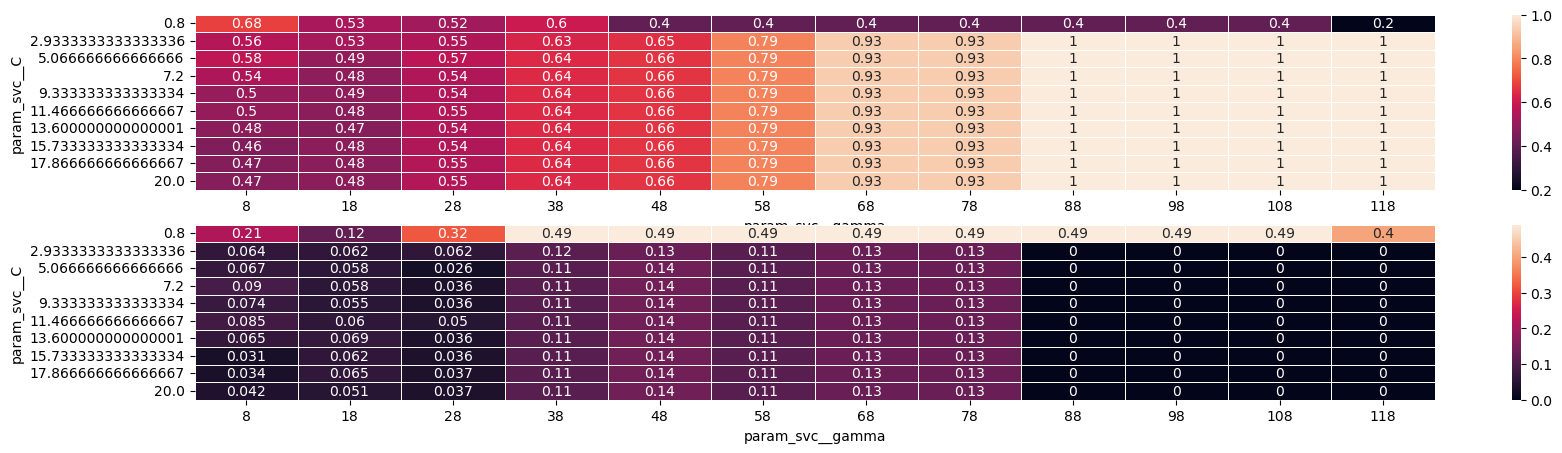

In [639]:
pv_table=table.pivot_table(index='param_svc__C',columns='param_svc__gamma',values='mean_test_score')
pv_table_std=table.pivot_table(index='param_svc__C',columns='param_svc__gamma',values='std_test_score')
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax1)
sns.heatmap(pv_table_std, annot=True, linewidths=.5, ax=ax2);

In [640]:
bests = grid.best_params_
bests

{'minmaxscaler': MinMaxScaler(),
 'svc': SVC(),
 'svc__C': 2.9333333333333336,
 'svc__gamma': 88}

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.6, stratify = y)

In [641]:
svm_pipe= make_pipeline( MinMaxScaler(), SVC(C=bests['svc__C'], gamma=bests['svc__gamma']))
svm_pipe.fit(X_train, y_train)
svm_pipe.score(X_test, y_test)

y_pred_2 = svm_pipe.predict(X_test)
matrix_2=confusion_matrix(y_test,y_pred_2)
matrix_2

array([[263,   1],
       [ 35,   6]], dtype=int64)

In [642]:
precision_score(y_test,y_pred_2)

0.8571428571428571

In [ ]:
### получены несколько подозрительные результаты, с фулл 1 precision при гамме > 88 и C > 2,9.
### для удобства пока возьмём gamma=100 и C=10
### однако неясно, как быть с разными генерацими при делении на трейн-тест

In [690]:
scores=[]
wines=[]
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.6, stratify = y)
    svm_pipe= make_pipeline( MinMaxScaler(), SVC(C=10, gamma=100))#C=bests['svc__C'], gamma=bests['svc__gamma']))
    svm_pipe.fit(X_train, y_train)
    svm_pipe.score(X_test, y_test)
    
    y_pred_2 = svm_pipe.predict(X_test)
    matrix_2=confusion_matrix(y_test,y_pred_2)
    matrix_2
    scores.append(precision_score(y_test,y_pred_2))
    wines.append(matrix_2[1,1])
np.mean(scores)
np.mean(wines)

3.76

In [691]:
np.mean(scores)

0.8870158730158729

In [ ]:
### тупой прогон через цикл даёт средний пресижн 0.88 - неплохо
### однако смущает количество вин, которое мы в итоге детектим;

In [692]:
y_pred_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [693]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       264
           1       0.80      0.10      0.17        41

    accuracy                           0.88       305
   macro avg       0.84      0.55      0.55       305
weighted avg       0.87      0.88      0.83       305



In [661]:
y_pred_2

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [694]:
### logreg -- очень подкачал, ожидал, что именно он даст лучший результаты, но оказался на уровне кнн

In [695]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

#cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 10)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]
iterations = range(1, 500, 5) # без этого вылезает куча варнингов

param_grid =[
    {'preprocessing': scaling,
     'clf__penalty': ['l2'], 
     'clf__solver': ['newton-cg' ,'lbfgs','liblinear', 'sag', 'saga'],
     'clf__max_iter' : iterations},
    {'preprocessing': scaling,
     'clf__penalty': ['l1'], 
     'clf__solver': ['liblinear'],
     'clf__max_iter' : iterations}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True, scoring='precision', n_jobs=-1)
grid.fit(X_train, y_train)
grid  

D:\trash2\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
D:\trash2\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'clf__max_iter': range(1, 500, 5),
                          'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__max_iter': range(1, 500, 5),
                          'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [696]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

138   \
mean_fit_time                                                 0.027208   
std_fit_time                                                  0.002154   
mean_score_time                                               0.010794   
std_score_time                                                0.000727   
param_clf__max_iter                                                 31   
param_clf__penalty                                                  l2   
param_clf__solver                                                 saga   
param_preprocessing                                     RobustScaler()   
params               {'clf__max_iter': 31, 'clf__penalty': 'l2', 'c...   
split0_test_score                                                  0.9   
split1_test_score                                             0.857143   
split2_test_score                                             0.666667   
split3_test_score                                               0.4375   
split4_test_score                                             0.461538   
mean_test_score                                                0.66457   
std_test_score                                                0.192509   
rank_test_score                                                      1   
split0_train_score                                            0.592593   
split1_train_score                                            0.608696   
split2_train_score                                            0.695652   
split3_train_score                                            0.692308   
split4_train_score                                                0.75   
mean_train_score                                               0.66785   
std_train_score                                               0.058792   

                                                                  2012  \
mean_fit_time                                                 0.012651   
std_fit_time                                                  0.007031   
mean_score_time                                               0.010828   
std_score_time                                                0.007899   
param_clf__max_iter                                                 16   
param_clf__penalty                                                  l1   
param_clf__solver                                            liblinear   
param_preprocessing                                     MinMaxScaler()   
params               {'clf__max_iter': 16, 'clf__penalty': 'l1', 'c...   
split0_test_score                                             0.833333   
split1_test_score                                             0.833333   
split2_test_score                                                  0.6   
split3_test_score                                                0.375   
split4_test_score                                             0.666667   
mean_test_score                                               0.661667   
std_test_score                                                0.170261   
rank_test_score                                                      2   
split0_train_score                                            0.631579   
split1_train_score                                                 0.5   
split2_train_score                                              0.6875   
split3_train_score                                            0.777778   
split4_train_score                                            0.666667   
mean_train_score                                              0.652705   
std_train_score                                               0.090348   

                                                                  2016  \
mean_fit_time                                                 0.010222   
std_fit_time                                                   0.00153   
mean_score_time                                               0.007286   
std_score_time                                                  0.00

In [697]:
grid.best_params_

{'clf__max_iter': 31,
 'clf__penalty': 'l2',
 'clf__solver': 'saga',
 'preprocessing': RobustScaler()}

In [698]:
pipe_1 = make_pipeline(RobustScaler(), LogisticRegression(solver = 'saga', penalty = 'l2') )
pipe_1.fit(X_train,y_train)
y_pred_1 = pipe_1.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       264
           1       0.58      0.51      0.55        41

    accuracy                           0.89       305
   macro avg       0.75      0.73      0.74       305
weighted avg       0.88      0.89      0.88       305



D:\trash2\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       264
           1       0.58      0.51      0.55        41

    accuracy                           0.89       305
   macro avg       0.75      0.73      0.74       305
weighted avg       0.88      0.89      0.88       305



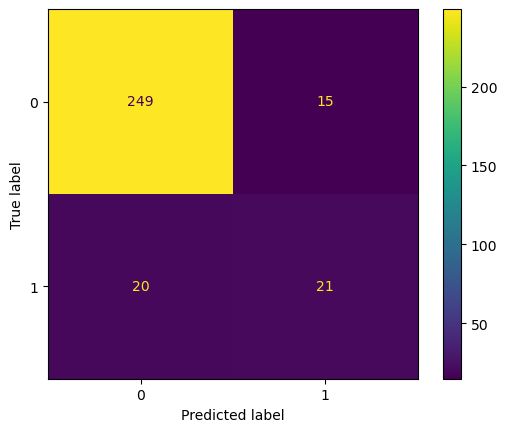

In [699]:
matrix = confusion_matrix(y_test, y_pred_1)
ConfusionMatrixDisplay(matrix).plot();
print(classification_report(y_test, y_pred_1))

In [700]:
#0.58 - так себе результат, попытаемся потеребить С

In [711]:
pipe_fin = make_pipeline(RobustScaler(), LogisticRegression(solver = 'saga', penalty = 'l2'))
print(pipe_fin)

from sklearn.model_selection import validation_curve

n_range = np.linspace(0.0001, 0.5, 500)
train_scores, test_scores = validation_curve(
    pipe_fin , X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = cv, 
    scoring="precision", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.4, 0.9)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Test score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 0.5, 20))
for i in np.arange(0,0.5,0.025):
    plt.vlines(i, 0.4,0.9, linestyles='dashed', colors='gray')

plt.legend(loc="best")
plt.show();

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression(solver='saga'))])


In [736]:
#даже 0.7 нет

In [735]:
pipe_end = make_pipeline( RobustScaler(), 
                         LogisticRegression(solver = 'saga', penalty = 'l2', C = 0.04))
pipe_end.fit(X_train,y_train)
y_pred_end = pipe_end.predict(X_test)
print(classification_report(y_test, y_pred_end))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       264
           1       0.62      0.20      0.30        41

    accuracy                           0.88       305
   macro avg       0.75      0.59      0.61       305
weighted avg       0.85      0.88      0.85       305



In [747]:
model_origin = make_pipeline(RobustScaler(), LogisticRegression(solver = 'saga', penalty = 'l2', C = 0.04, max_iter=1000))

In [748]:
scoring = ["precision"]
cv_scores = ["test_precision",'train_precision']
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=20)
cv_results_model_origin = pd.DataFrame(
    cross_validate(
        model_origin,
        X_train,
        y_train,
        scoring=scoring,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_model_origin[cv_scores].agg(["mean", "std"]).T

D:\trash2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\trash2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\trash2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\trash2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill

mean       std
test_precision   0.554000  0.335561
train_precision  0.696556  0.086596

In [750]:
### варнинги, как я понял, появляются из-за излишней консервативности модели, когда в позиции 1,1 confusion_matrix стоит 0

In [749]:
model_tuned = TunedThresholdClassifierCV(estimator=model_origin, scoring="precision")
cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_tuned,
        X_train,
        y_train,
        scoring=scoring,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
        n_jobs=-1
    )
)
cv_results_model_tuned[cv_scores].agg(["mean", "std"]).T

mean       std
test_precision   0.533607  0.362253
train_precision  0.693942  0.095009

In [751]:
# вот тут я ничего не понял, оттюненный порог даёт меньший скор, мб делаю что-то не так

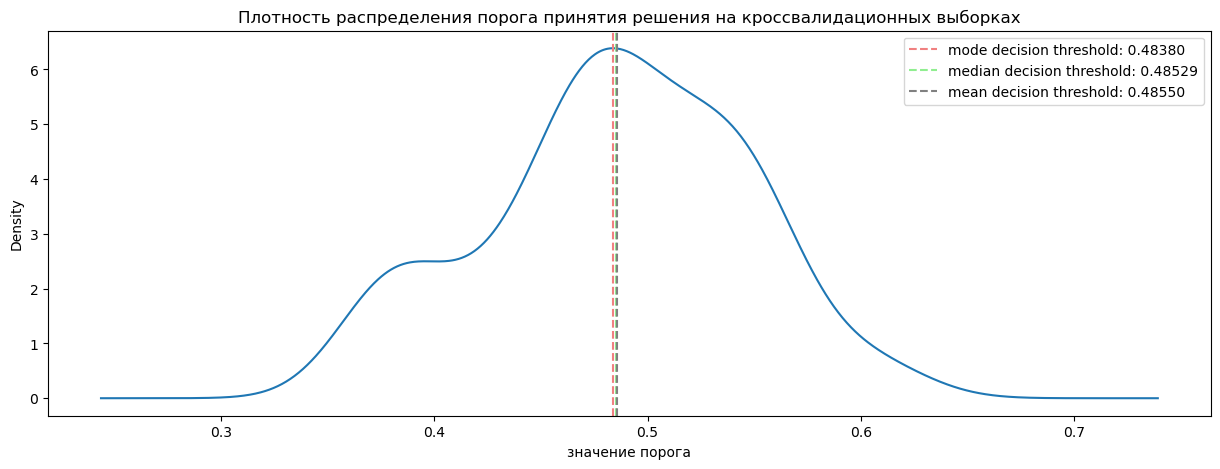

In [753]:
decision_threshold = pd.Series(
    [est.best_threshold_ for est in cv_results_model_tuned["estimator"]],
)

fig, ax = plt.subplots(figsize=(15,5))

ax = decision_threshold.plot.kde(bw_method=None) # w_method=0.3 'scott', 'silverman',
line = ax.get_lines() # забрал список отрисованных линий
x_plt, y_plt = line[0].get_data() # из списка взял нужную линию для разборки по точкам 

ths = {
    'mode':   [x_plt[np.argmax(y_plt)],'lightcoral'],
    'median': [decision_threshold.median(), 'lightgreen'],
    'mean':   [decision_threshold.mean(),  'gray']
}

for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )

ax.set_xlabel("значение порога")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Плотность распределения порога принятия решения на кроссвалидационных выборках")

In [759]:
ths_final = {
    'origin': 0.5,
    'mode':   x_plt[np.argmax(y_plt)],
    'median': decision_threshold.median(),
    'mean':   decision_threshold.mean(),
}
comparison =pd.DataFrame()
for key in ths_final:
    final_tune = FixedThresholdClassifier(model_origin, threshold=ths_final[key]).fit(X_train, y_train)
    comparison.loc[key,'train']= precision_score(y_train, final_tune.predict(X_train))
    comparison.loc[key,'test'] = precision_score(y_test, final_tune.predict(X_test))

comparison.sort_values(by='test')
#ths_final[key]

train      test
mode    0.684211  0.571429
median  0.705882  0.571429
mean    0.705882  0.571429
origin  0.714286  0.615385

In [760]:
### итог: берём SVM.